[View in Colaboratory](https://colab.research.google.com/github/eurismarpires/colab_test/blob/master/python_midi_v2.ipynb)

**Download midi e instalação do Python Midi**

In [311]:
!ls

datalab  Music_Generator_Demo


In [312]:
!git clone https://github.com/llSourcell/Music_Generator_Demo.git

fatal: destination path 'Music_Generator_Demo' already exists and is not an empty directory.


In [313]:
!ls

datalab  Music_Generator_Demo


In [314]:
!pip install python-midi

In [0]:
import midi

In [316]:
!ls

datalab  Music_Generator_Demo


## links uteis
### https://www.dataquest.io/blog/pandas-python-tutorial/
### https://blogs.technet.microsoft.com/machinelearning/2017/12/06/music-generation-with-azure-machine-learning/
### https://github.com/vishnubob/python-midi
### https://github.com/llSourcell/Music_Generator_Demo/blob/master/midi_manipulation.py

In [0]:
import pandas as pd

In [0]:
import midi

In [0]:
midifile = 'Music_Generator_Demo/Pop_Music_Midi/Blank Space - Verse.midi'

In [0]:
pattern = midi.read_midifile(midifile)

In [321]:
pattern

midi.Pattern(format=1, resolution=128, tracks=\
[midi.Track(\
  [midi.SetTempoEvent(tick=0, data=[7, 161, 32]),
   midi.TrackNameEvent(tick=0, text='\x00', data=[0]),
   midi.TimeSignatureEvent(tick=0, data=[4, 2, 24, 8]),
   midi.KeySignatureEvent(tick=0, data=[0, 0]),
   midi.ProgramChangeEvent(tick=0, channel=0, data=[1]),
   midi.NoteOnEvent(tick=128, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=65, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=65, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[60, 90]),
   midi.NoteOnEvent(tick=1, channel=1, data=[60, 102]),
   midi.NoteOffEvent(tick=31, channel=1, data=[

In [208]:
pattern.format

1

In [209]:
pattern.resolution

128

# The resolution is the number of pulses, or ticks, per quarter note (PPQ)

In [210]:
len(pattern) # numero de canais

3

In [211]:
len(pattern[0]) # numero de eventos canal 1

114

In [212]:
pattern[0][0]

midi.SetTempoEvent(tick=0, data=[7, 161, 32])

In [213]:
pattern[0][1]

midi.TrackNameEvent(tick=0, text='\x00', data=[0])

In [214]:
pattern[0][2]

midi.TimeSignatureEvent(tick=0, data=[4, 2, 24, 8])

In [224]:
track = 0
tick = []
channel = []
data = []
name = []
tipo = []
data_0 = []
pitch = []
tick_acum = []
acum = 0
for evt in pattern[track]:
    if isinstance(evt, midi.NoteEvent):
      tick.append(evt.tick)
      channel.append(evt.channel)
      data.append(evt.data)
      name.append(evt.name)
      if evt.name=='Note On':
        tipo.append(1)
      else:
        tipo.append(0)
      data_0.append(evt.data[0])
      pitch.append('p'+str(evt.data[0]))
      acum = acum + evt.tick
      tick_acum.append(acum)
    
df = pd.DataFrame(
    {'tick':tick,
     'channel':channel,
     'data':data,
     'data_0':data_0,
     'pitch':pitch,
     'name':name,
     'tipo':tipo,
     'tick_acum':tick_acum
    }
)
df.head(10)

,channel,data,data_0,name,pitch,tick,tick_acum,tipo
0,1,"[60, 102]",60,Note On,p60,128,128,1
1,1,"[60, 90]",60,Note Off,p60,31,159,0
2,1,"[60, 102]",60,Note On,p60,1,160,1
3,1,"[60, 90]",60,Note Off,p60,31,191,0
4,1,"[60, 102]",60,Note On,p60,65,256,1
5,1,"[60, 90]",60,Note Off,p60,31,287,0
6,1,"[60, 102]",60,Note On,p60,1,288,1
7,1,"[60, 90]",60,Note Off,p60,31,319,0
8,1,"[60, 102]",60,Note On,p60,65,384,1
9,1,"[60, 90]",60,Note Off,p60,31,415,0


In [0]:
def getTrack(track=0):
    tick = []
    channel = []
    data = []
    name = []
    data_0 = []
    pitch = []
    tick_acum = []
    tipo = []
    acum = 0
    for evt in pattern[track]:
        if isinstance(evt, midi.NoteEvent):
          tick.append(evt.tick)
          channel.append(evt.channel)
          data.append(evt.data)
          name.append(evt.name)
          if evt.name=='Note On':
            tipo.append(1)
          else:
            tipo.append(0)
          data_0.append(evt.data[0])
          pitch.append('p'+str(evt.data[0]))
          acum = acum + evt.tick
          tick_acum.append(acum)
    
    df = pd.DataFrame(
        {'tick':tick,
         'channel':channel,
         'data':data,
         'data_0':data_0,
         'pitch':pitch,
         'name':name,
         'tipo':tipo,
         'tick_acum':tick_acum
        }
    )
    return df

In [226]:
getTrack(0).head()

,channel,data,data_0,name,pitch,tick,tick_acum,tipo
0,1,"[60, 102]",60,Note On,p60,128,128,1
1,1,"[60, 90]",60,Note Off,p60,31,159,0
2,1,"[60, 102]",60,Note On,p60,1,160,1
3,1,"[60, 90]",60,Note Off,p60,31,191,0
4,1,"[60, 102]",60,Note On,p60,65,256,1


In [22]:
getTrack(1).head()

,channel,data,data_0,name,tick,tick_acum,tipo
0,2,"[64, 81]",64,Note On,0,0,1
1,2,"[67, 81]",67,Note On,0,0,1
2,2,"[60, 81]",60,Note On,0,0,1
3,2,"[60, 90]",60,Note Off,126,126,0
4,2,"[64, 90]",64,Note Off,0,126,0


In [23]:
getTrack(2).head()

,channel,data,data_0,name,tick,tick_acum,tipo
0,3,"[48, 81]",48,Note On,0,0,1
1,3,"[48, 90]",48,Note Off,190,190,0
2,3,"[48, 59]",48,Note On,2,192,1
3,3,"[48, 90]",48,Note Off,60,252,0
4,3,"[48, 59]",48,Note On,4,256,1


In [0]:
df = getTrack(0)

In [0]:
labels = df[['pitch','name','tick']]

In [228]:
labels

,pitch,name,tick
0,p60,Note On,128
1,p60,Note Off,31
2,p60,Note On,1
3,p60,Note Off,31
4,p60,Note On,65
5,p60,Note Off,31
6,p60,Note On,1
7,p60,Note Off,31
8,p60,Note On,65
9,p60,Note Off,31


In [0]:
df1 = df[['data_0','tipo','tick']]

In [0]:
df2 = df[['data_0']]

In [0]:
%matplotlib inline

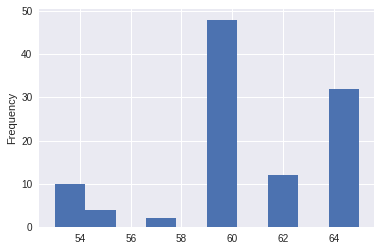

In [232]:
df['data_0'].plot(kind="hist")

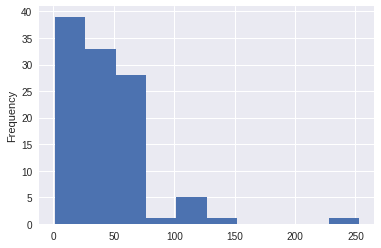

In [233]:
df['tick'].plot(kind="hist")

In [234]:
df1.head()

,data_0,tipo,tick
0,60,1,128
1,60,0,31
2,60,1,1
3,60,0,31
4,60,1,65


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
mlb = MultiLabelBinarizer()

In [238]:
 mlb.fit(labels.values)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [0]:
cl = mlb.classes_

In [240]:
cl

array([1, 2, 31, 33, 34, 63, 65, 67, 95, 126, 128, 253, 'Note Off',
       'Note On', 'p53', 'p55', 'p57', 'p60', 'p62', 'p64', 'p65'],
      dtype=object)

In [0]:
teste = labels.values[20]

In [308]:
teste

array(['p62', 'Note On', 1], dtype=object)

In [0]:
classes = mlb.transform(labels.values)

In [323]:
classes

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [244]:
classes.shape

(108, 21)

In [245]:
classes[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [246]:
classes[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
raw_midi = scaler.fit_transform(df1)

In [249]:
raw_midi

array([[-0.16423018,  1.        ,  2.30417608],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        ,  0.71367044],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        ,  0.71367044],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        ,  0.71367044],
       [-0.16423018, -1.        ,  2.25368384],
       [ 1.05900153,  1.        , -0.87683519],
       [ 1.05900153, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  0.6631782 ],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  0.6631782 ],
       [ 0.44738567,  1.        , -0.902

In [333]:
scaler.inverse_transform(raw_midi[3])

array([60.,  0., 31.])

In [251]:
raw_midi.shape

(108, 3)

In [252]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 20
dataX = []
dataY = []
for i in range(0, raw_midi.shape[0] - seq_length, 1):
	seq_in = raw_midi[i:i + seq_length]
	seq_out = classes[i + seq_length]
	dataX.append(seq_in)
	dataY.append(seq_out)
n_patterns = len(dataX)
print "Total Patterns: ", n_patterns

Total Patterns:  88


In [253]:
dataX[0]

array([[-0.16423018,  1.        ,  2.30417608],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        ,  0.71367044],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        ,  0.71367044],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [-0.16423018,  1.        ,  0.71367044],
       [-0.16423018, -1.        ,  2.25368384],
       [ 1.05900153,  1.        , -0.87683519],
       [ 1.05900153, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  0.6631782 ],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  0.6631782 ]])

In [254]:
dataY[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [0]:
import numpy as np

In [0]:
X = np.reshape(dataX, (len(dataX), seq_length, 3))

In [257]:
X.shape

(88, 20, 3)

In [258]:
len(dataY)

88

In [0]:
y = np.asarray(dataY)

In [260]:
y.shape

(88, 21)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam

In [262]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_length, 3),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='sigmoid'))
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 20, 256)           266240    
_________________________________________________________________
dropout_9 (Dropout)          (None, 20, 256)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 21)                5397      
Total params: 796,949
Trainable params: 796,949
Non-trainable params: 0
_________________________________________________________________
None


In [263]:
history = model.fit(X, y, epochs=100,batch_size=32, verbose=1, shuffle=False)

Epoch 1/100
88/88 [==============================] - 2s 18ms/step - loss: 0.6913 - acc: 0.5714
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6715 - acc: 0.8431
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5831 - acc: 0.8523
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3734 - acc: 0.8577
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3250 - acc: 0.8609
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3189 - acc: 0.8550
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3145 - acc: 0.8447
Epoch 8/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3206 - acc: 0.8474
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3127 - acc: 0.8577
Epoch 10/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3095 - acc: 0.8577
Epoch 11/100
88/88 [==============================] - 0s 3

88/88 [==============================] - 0s 3ms/step - loss: 0.2916 - acc: 0.8728
Epoch 24/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2847 - acc: 0.8723
Epoch 25/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2848 - acc: 0.8804
Epoch 26/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2811 - acc: 0.8837
Epoch 27/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2774 - acc: 0.8853
Epoch 28/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2734 - acc: 0.8902
Epoch 29/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2631 - acc: 0.9042
Epoch 30/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2468 - acc: 0.8999
Epoch 31/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2246 - acc: 0.9237
Epoch 32/100
88/88 [==============================] - 0s 3ms/step - loss: 0.2029 - acc: 0.9264
Epoch 33/100
88/88 [==============================] - 0s 3ms/st

88/88 [==============================] - 0s 3ms/step - loss: 0.1651 - acc: 0.9318
Epoch 46/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1605 - acc: 0.9318
Epoch 47/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1606 - acc: 0.9324
Epoch 48/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1554 - acc: 0.9394
Epoch 49/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1572 - acc: 0.9334
Epoch 50/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1531 - acc: 0.9329
Epoch 51/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1544 - acc: 0.9361
Epoch 52/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1505 - acc: 0.9389
Epoch 53/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1551 - acc: 0.9367
Epoch 54/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1559 - acc: 0.9356
Epoch 55/100
88/88 [==============================] - 0s 3ms/st

88/88 [==============================] - 0s 3ms/step - loss: 0.1318 - acc: 0.9448
Epoch 68/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1374 - acc: 0.9421
Epoch 69/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1330 - acc: 0.9470
Epoch 70/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1283 - acc: 0.9453
Epoch 71/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1321 - acc: 0.9443
Epoch 72/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1265 - acc: 0.9464
Epoch 73/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1305 - acc: 0.9453
Epoch 74/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1299 - acc: 0.9432
Epoch 75/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1310 - acc: 0.9448
Epoch 76/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1222 - acc: 0.9481
Epoch 77/100
88/88 [==============================] - 0s 3ms/st

88/88 [==============================] - 0s 3ms/step - loss: 0.1370 - acc: 0.9470
Epoch 93/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1200 - acc: 0.9486
Epoch 94/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1145 - acc: 0.9524
Epoch 95/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1108 - acc: 0.9573
Epoch 96/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1041 - acc: 0.9610
Epoch 97/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1087 - acc: 0.9535
Epoch 98/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1047 - acc: 0.9600
Epoch 99/100
88/88 [==============================] - 0s 3ms/step - loss: 0.1034 - acc: 0.9583
Epoch 100/100
88/88 [==============================] - 0s 3ms/step - loss: 0.0970 - acc: 0.9621


In [264]:

# list all data in history
print(history.history.keys())

['acc', 'loss']


In [0]:
import matplotlib.pyplot as plt

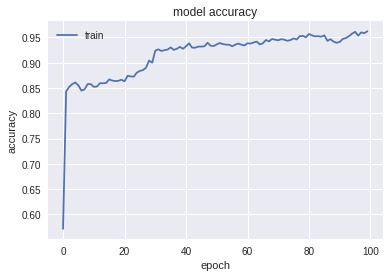

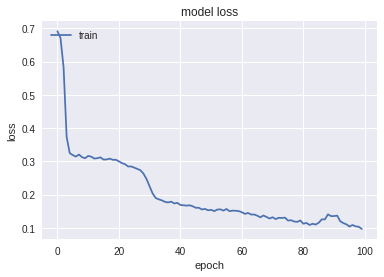

In [266]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Prevendo somente uma label**

In [267]:
type(pattern)

midi.containers.Pattern

In [0]:

start = np.random.randint(0, len(dataX)-1)

In [269]:
start

13

In [0]:
pattern = dataX[start]

In [271]:
pattern

array([[-0.16423018, -1.        ,  2.25368384],
       [ 1.05900153,  1.        , -0.87683519],
       [ 1.05900153, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  0.6631782 ],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  0.6631782 ],
       [ 0.44738567,  1.        , -0.90208131],
       [ 0.44738567, -1.        ,  0.6631782 ],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [ 0.44738567,  1.        , -0.90208131],
       [ 0.44738567, -1.        , -0.14469768],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [ 0.44738567,  1.        , -0.90208131],
       [ 0.44738567, -1.        ,  0.6631782 ],
       [-1.08165397,  1.        , -0.90208131],
       [-1.08165397, -1.        ,  0.6631782 ],
       [-0.16423018,  1.        ,  0.71367044]])

In [0]:
gx = np.reshape(pattern, (1, len(pattern), 3))

In [0]:
prediction = model.predict(gx, verbose=0)

In [274]:
prediction[0]

array([2.4650639e-03, 2.4032600e-04, 8.0012691e-01, 4.2265397e-03,
       1.7443470e-05, 1.7241681e-01, 2.5380833e-02, 2.5050732e-04,
       8.0041873e-04, 4.5262636e-03, 2.0405854e-04, 5.7352451e-04,
       9.9329221e-01, 6.8421019e-03, 9.6341297e-02, 3.0480741e-02,
       3.5140868e-02, 9.0139753e-01, 7.3240958e-03, 2.0866145e-03,
       4.0343455e-03], dtype=float32)

In [0]:
idxs = np.argsort(prediction[0])[::-1][:3]

In [276]:
idxs

array([12, 17,  2])

In [0]:
tr = mlb.inverse_transform(classes)

In [278]:
tr

[(128, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (1, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (65, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (1, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (65, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (1, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (65, 'Note On', 'p60'),
 (126, 'Note Off', 'p60'),
 (2, 'Note On', 'p64'),
 (31, 'Note Off', 'p64'),
 (1, 'Note On', 'p64'),
 (63, 'Note Off', 'p64'),
 (1, 'Note On', 'p64'),
 (63, 'Note Off', 'p64'),
 (1, 'Note On', 'p62'),
 (63, 'Note Off', 'p62'),
 (1, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (1, 'Note On', 'p62'),
 (31, 'Note Off', 'p62'),
 (1, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (1, 'Note On', 'p62'),
 (63, 'Note Off', 'p62'),
 (1, 'Note On', 'p57'),
 (63, 'Note Off', 'p57'),
 (65, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (1, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (65, 'Note On', 'p60'),
 (31, 'Note Off', 'p60'),
 (1, 'Note On', 'p60'),
 (31, 'Note Off', 

In [324]:
tr[3]

(31, 'Note Off', 'p60')

In [326]:
mlb.transform([tr[3]])

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]])

In [279]:
mlb.classes_

array([1, 2, 31, 33, 34, 63, 65, 67, 95, 126, 128, 253, 'Note Off',
       'Note On', 'p53', 'p55', 'p57', 'p60', 'p62', 'p64', 'p65'],
      dtype=object)

In [0]:
a, b, c = idxs

In [0]:
prob_classes = mlb.classes_

In [0]:
prev = prob_classes[b],prob_classes[a],prob_classes[c]

In [290]:
prev

('p60', 'Note Off', 31)

In [0]:
a = mlb.transform([prev])

In [330]:
a

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]])

In [332]:
mlb.inverse_transform(a)

[(31, 'Note Off', 'p60')]

In [0]:
########fazer aqui uma conversão para números

In [334]:
raw_midi[3]

array([-0.16423018, -1.        , -0.14469768])

In [339]:
df1.iloc[3]

data_0    60
tipo       0
tick      31
Name: 3, dtype: int64

In [341]:
df1[:4]

,data_0,tipo,tick
0,60,1,128
1,60,0,31
2,60,1,1
3,60,0,31


In [342]:
prev

('p60', 'Note Off', 31)

In [0]:
prev1 = np.array([60,0,31])

In [0]:
prev2 = scaler.transform([prev1])

In [347]:
prev2

array([[-0.16423018, -1.        , -0.14469768]])

In [0]:

start = np.random.randint(0, len(dataX)-1)

In [0]:
pattern = dataX[start]

In [355]:
pattern.shape

(20, 3)

In [0]:
pattern = np.concatenate([pattern,prev2])

In [357]:
pattern.shape

(21, 3)

In [0]:
pattern=pattern[1:len(pattern)]

In [361]:
pattern

array([[-0.16423018, -1.        ,  0.6631782 ],
       [-2.30488568,  1.        ,  0.71367044],
       [-2.30488568, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  2.25368384],
       [-2.30488568,  1.        , -0.06895931],
       [-2.30488568, -1.        ,  0.6631782 ],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        ,  0.6631782 ],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        ,  0.6631782 ],
       [-2.30488568,  1.        , -0.09420543],
       [-2.30488568, -1.        , -0.14469768],
       [-2.30488568,  1.        , -0.90208131],
       [-2.30488568, -1.        , -0.14469768],
       [-0.16423018, -1.        , -0.14469768]])

## **Prevendo uma sequencia**

In [0]:

start = np.random.randint(0, len(dataX)-1)

In [293]:
start

84

In [0]:
pattern = dataX[start]

In [295]:
pattern

array([[ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  2.25368384],
       [-1.69326982,  1.        , -0.06895931],
       [-1.69326982, -1.        ,  0.6631782 ],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        ,  0.6631782 ],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        ,  0.6631782 ],
       [-1.69326982,  1.        ,  0.71367044],
       [-1.69326982, -1.        , -0.14469768],
       [-0.16423018,  1.        , -0.90208131],
       [-0.16423018, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        ,  2.25368384],
       [ 1.36480946,  1.        , -0.87683519],
       [ 1.36480946, -1.        , -0.14469768],
       [ 1.05900153,  1.        , -0.90208131],
       [ 1.05900153, -1.        , -0.14469768]])

In [298]:
pattern.shape

(20, 3)

In [297]:
prediction.shape

(1, 21)

In [296]:
generate = list()
for i in range(5):
  gx = np.reshape(pattern, (1, len(pattern), 3))
  prediction = model.predict(gx, verbose=0)
  print(prediction)
  generate.append(prediction)
  idxs = np.argsort(prediction[0])[::-1][:3]
  pattern = np.concatenate([pattern,prediction])
  pattern = pattern[1:len(pattern)]
  

[[6.2385458e-01 2.1279419e-03 1.1336689e-03 2.6296848e-02 2.0815653e-01
  8.5441731e-03 3.1812966e-03 1.0632148e-01 1.7138110e-03 1.1950179e-03
  3.9589568e-04 3.2217979e-02 1.5195912e-02 9.8786503e-01 8.9035086e-02
  1.3535532e-01 9.9625057e-03 3.1839781e-02 7.9752910e-01 1.6845981e-02
  2.2735654e-03]]


ValueError: ignored